In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# loading the dataset to a Pandas DataFrame

data=pd.read_csv('C:/Users/yeswa/OneDrive/Desktop/The Folder/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# checking the number of missing values in each column

data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# dataset informations

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe().T.head()


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [6]:
data.shape


(284807, 31)

In [7]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud_cases=len(data[data['Class']==1])


In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
print(' Number of Fraud Cases:',fraud_cases)


 Number of Fraud Cases: 492


In [14]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
130922,79460.0,-1.372568,0.764687,2.230117,-1.266489,-0.514188,0.615138,-0.616693,-2.524349,1.471306,...,2.362026,-0.032761,0.133550,0.204729,-0.114492,-0.666023,-0.266088,-0.315678,1.00,0
227914,145281.0,2.070802,0.269887,-2.593894,0.467596,0.945394,-1.279748,0.796059,-0.501774,0.031588,...,0.044424,0.269583,-0.061077,0.659527,0.419134,0.680146,-0.106227,-0.046754,32.11,0
236463,148823.0,-1.093439,-0.058645,0.041188,-2.093772,3.903790,3.131908,0.380979,0.758381,-0.469173,...,-0.294012,-1.027414,-0.206925,0.691949,0.601664,0.229782,-0.230077,-0.181152,0.99,0
172764,121231.0,-1.184050,-0.720675,1.437420,-2.492425,-0.308835,0.554343,0.942420,-0.188333,-0.988966,...,-0.116763,-0.320398,-0.038417,-1.067870,0.539239,-0.430872,-0.192927,-0.206341,226.00,0
257145,158026.0,-1.401865,0.574414,-0.699218,-1.699828,2.899665,3.475991,0.167105,1.298069,-0.776929,...,-0.174853,-0.858523,-0.258559,0.720468,0.646053,0.413605,-0.290968,-0.038219,29.87,0


In [18]:
new_dataset.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93259.065041,-0.028717,-0.047564,0.049129,0.015605,0.055026,0.099623,-0.004544,0.014665,-0.034418,...,0.027944,0.005363,-0.023784,-0.014115,0.006004,0.021296,-0.020176,-0.000985,-0.001144,91.259837
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
130922   79460.0 -1.372568  0.764687  2.230117 -1.266489 -0.514188  0.615138   
227914  145281.0  2.070802  0.269887 -2.593894  0.467596  0.945394 -1.279748   
236463  148823.0 -1.093439 -0.058645  0.041188 -2.093772  3.903790  3.131908   
172764  121231.0 -1.184050 -0.720675  1.437420 -2.492425 -0.308835  0.554343   
257145  158026.0 -1.401865  0.574414 -0.699218 -1.699828  2.899665  3.475991   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [23]:
print(Y)

130922    0
227914    0
236463    0
172764    0
257145    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [24]:
legit.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

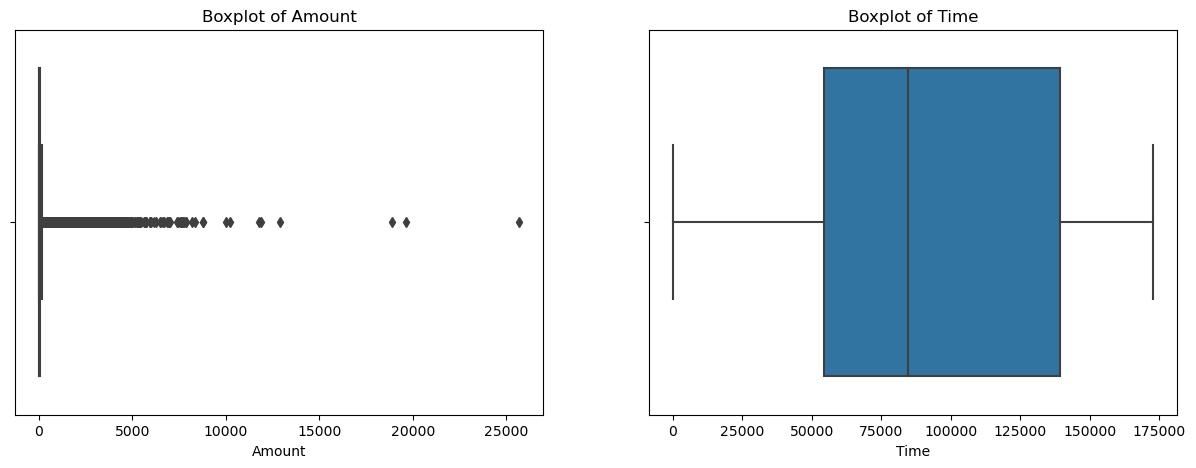

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=data, x='Amount', ax=axes[0])
axes[0].set_title('Boxplot of Amount')

sns.boxplot(data=data, x='Time', ax=axes[1])
axes[1].set_title('Boxplot of Time')

plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# Standardize the 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [27]:
from sklearn.utils import resample

# Separate the classes
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Undersample the majority class
non_fraud_downsampled = non_fraud.sample(n=len(fraud), random_state=42)
balanced_data = pd.concat([fraud, non_fraud_downsampled])

# Verify the balance of the dataset
class_counts = balanced_data['Class'].value_counts()
print(class_counts)

Class
1    492
0    492
Name: count, dtype: int64


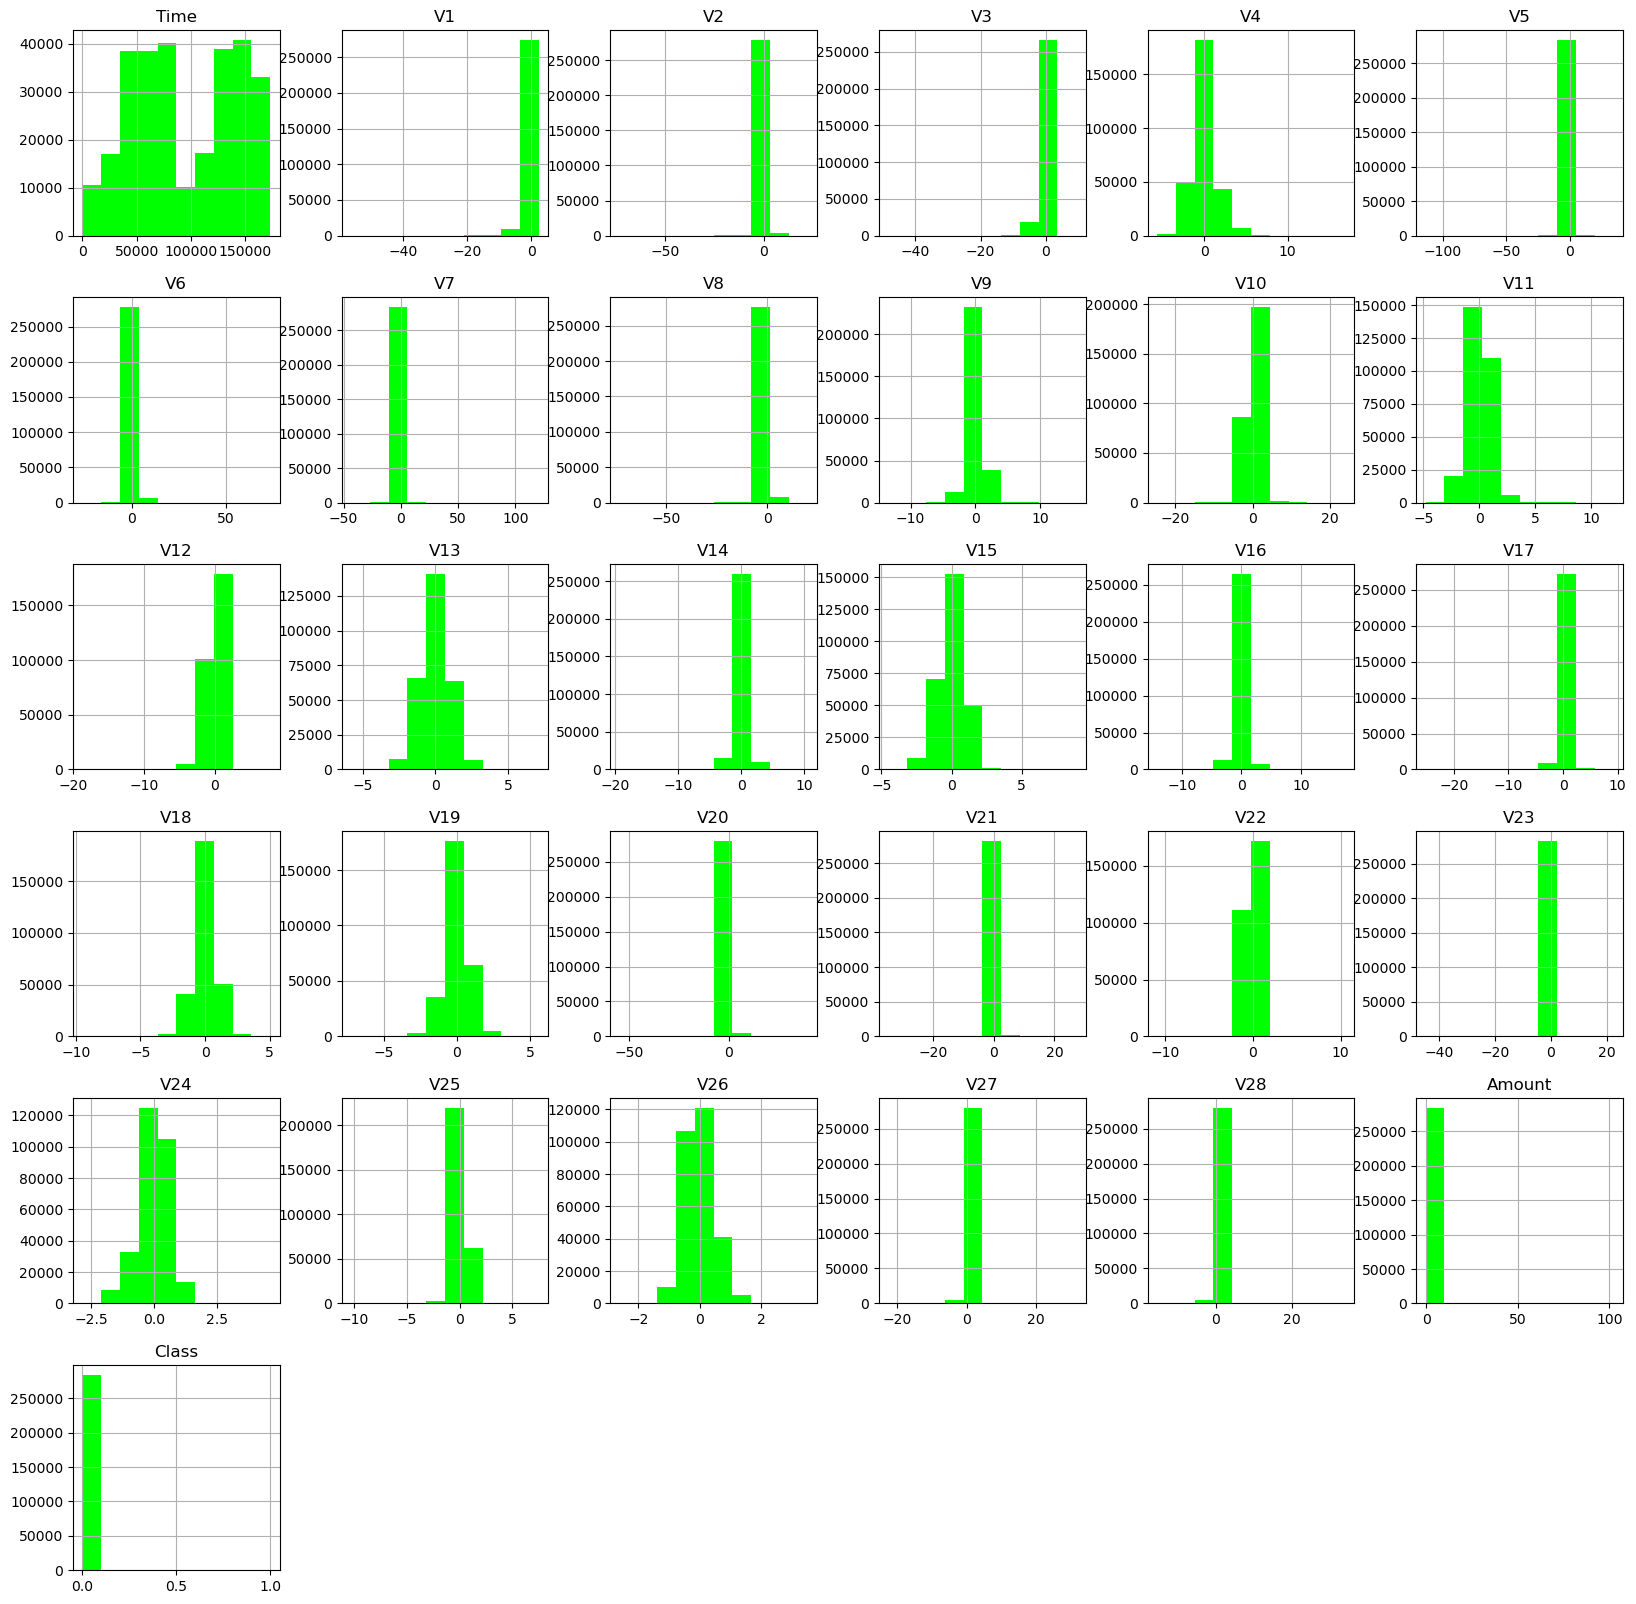

In [28]:
data.hist(figsize=(20,20),color='lime')
plt.show()

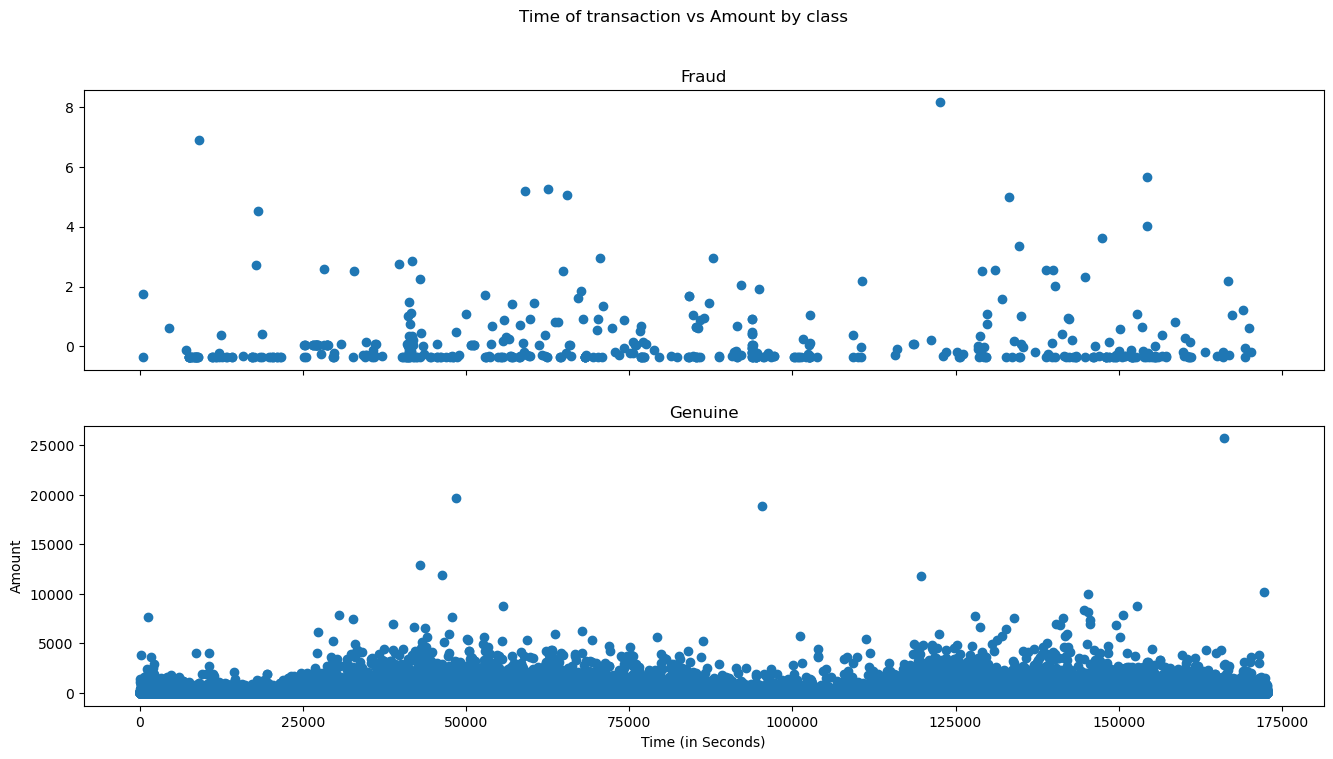

In [29]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

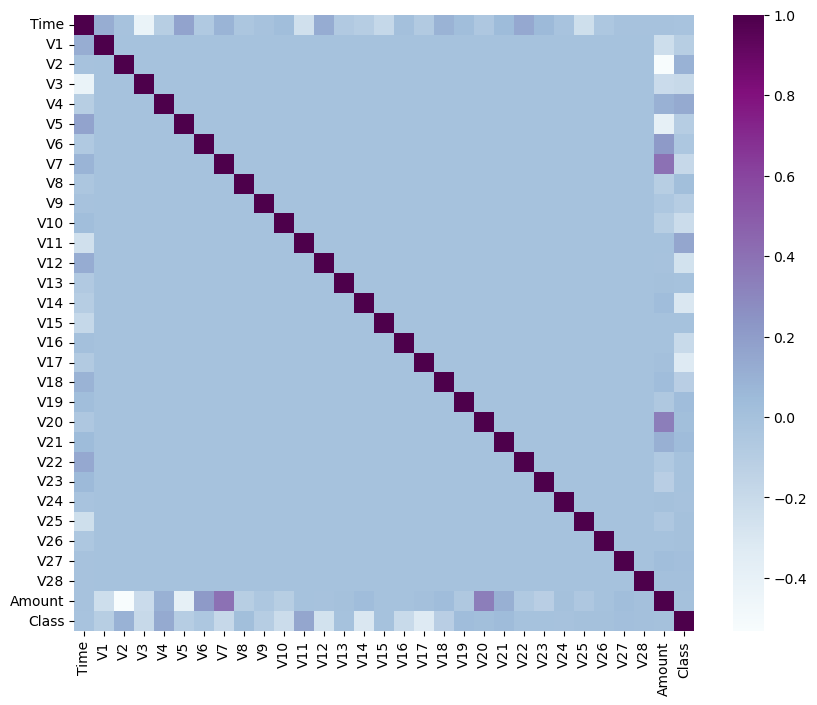

In [30]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

Dealing with Imbalanced data

In [31]:
legit_sample = legit.sample(n=492)

In [32]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [33]:
new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217033,140733.0,-0.749285,1.217083,0.428736,-0.409257,-0.073297,-1.353833,0.460188,-1.877344,0.096947,...,1.314021,-0.902950,0.523232,0.897921,-0.546184,0.090278,0.225157,0.094252,1.79,0
132004,79817.0,-1.449471,0.719487,1.492118,1.635890,-0.781768,1.468772,-0.983452,1.517346,0.175508,...,-0.121137,-0.274230,0.079074,-0.308672,-0.507484,-0.434028,-0.128284,-0.030780,20.08,0
83246,59753.0,1.065393,-0.030780,0.627220,1.165405,-0.349015,0.078719,-0.234575,0.067968,0.254183,...,0.166804,0.434973,-0.143718,-0.265431,0.471961,-0.245964,0.048631,0.036038,67.00,0
161843,114572.0,-0.411712,0.297452,1.477109,-0.214685,-0.030515,-0.339099,0.288609,0.013657,0.472159,...,0.370224,1.192999,-0.189763,-0.061367,-0.227948,-0.118686,0.195488,0.184888,39.85,0
134962,81049.0,-0.427897,-0.328791,0.775465,-0.601708,-0.828493,-0.640699,0.436316,-0.141550,-1.389369,...,-0.218293,-0.155568,0.205441,0.569295,-0.911381,0.988993,0.008144,0.203626,120.64,0


In [34]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217033,140733.0,-0.749285,1.217083,0.428736,-0.409257,-0.073297,-1.353833,0.460188,-1.877344,0.096947,...,1.314021,-0.902950,0.523232,0.897921,-0.546184,0.090278,0.225157,0.094252,1.79,0
132004,79817.0,-1.449471,0.719487,1.492118,1.635890,-0.781768,1.468772,-0.983452,1.517346,0.175508,...,-0.121137,-0.274230,0.079074,-0.308672,-0.507484,-0.434028,-0.128284,-0.030780,20.08,0
83246,59753.0,1.065393,-0.030780,0.627220,1.165405,-0.349015,0.078719,-0.234575,0.067968,0.254183,...,0.166804,0.434973,-0.143718,-0.265431,0.471961,-0.245964,0.048631,0.036038,67.00,0
161843,114572.0,-0.411712,0.297452,1.477109,-0.214685,-0.030515,-0.339099,0.288609,0.013657,0.472159,...,0.370224,1.192999,-0.189763,-0.061367,-0.227948,-0.118686,0.195488,0.184888,39.85,0
134962,81049.0,-0.427897,-0.328791,0.775465,-0.601708,-0.828493,-0.640699,0.436316,-0.141550,-1.389369,...,-0.218293,-0.155568,0.205441,0.569295,-0.911381,0.988993,0.008144,0.203626,120.64,0


In [35]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191,1


In [36]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [37]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95227.093496,-0.011729,0.015741,-0.001106,0.066290,-0.015261,-0.029734,-0.016404,0.022893,-0.071093,...,-0.014643,0.000846,0.051114,-0.020611,0.016421,-0.002533,0.028018,0.007139,0.000104,84.447297
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


In [38]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [39]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
217033  140733.0 -0.749285  1.217083  0.428736 -0.409257 -0.073297 -1.353833   
132004   79817.0 -1.449471  0.719487  1.492118  1.635890 -0.781768  1.468772   
83246    59753.0  1.065393 -0.030780  0.627220  1.165405 -0.349015  0.078719   
161843  114572.0 -0.411712  0.297452  1.477109 -0.214685 -0.030515 -0.339099   
134962   81049.0 -0.427897 -0.328791  0.775465 -0.601708 -0.828493 -0.640699   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [40]:
print(Y)

217033    0
132004    0
83246     0
161843    0
134962    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [43]:
model = LogisticRegression()

In [44]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

 Model Evaluation

 Accuracy Score

In [45]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [46]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9783989834815756


In [47]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [48]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9847715736040609


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Assuming balanced_data is the preprocessed and balanced dataset
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

ROC-AUC Score: 0.9544939187796331


Model Training and Hyperparameter Tuning

In [50]:
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets or when you need a simple model
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # Type of regularization
}

In [51]:
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [52]:
ada = AdaBoostClassifier()
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5]
}

In [53]:
def grid_search(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=3, n_jobs=-1, scoring='roc_auc', verbose=2)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {model.__class__.__name__}: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Random Forest
best_rf = grid_search(rf, rf_param_grid)

# AdaBoost
best_ada = grid_search(ada, ada_param_grid)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for RandomForestClassifier: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC AUC for RandomForestClassifier: 0.5132737991181554
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for AdaBoostClassifier: {'learning_rate': 0.01, 'n_estimators': 200}
Best ROC AUC for AdaBoostClassifier: 0.5059984496206161
